In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [ ]:
customers.shape,products.shape, transactions.shape

((200, 4), (100, 4), (1000, 7))

In [ ]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
print(customers.info(),products.info(), transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [ ]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [ ]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [ ]:
customers.duplicated().sum(),products.duplicated().sum(), transactions.duplicated().sum()

(0, 0, 0)

In [ ]:
customers.nunique()

,0
CustomerID,200
CustomerName,200
Region,4
SignupDate,179


In [ ]:
products.nunique()

,0
ProductID,100
ProductName,66
Category,4
Price,100


In [ ]:
transactions.nunique()

,0
TransactionID,1000
CustomerID,199
ProductID,100
TransactionDate,1000
Quantity,4
TotalValue,369
Price,100


In [ ]:
duplicate_names = products.groupby('ProductName')['ProductID'].nunique()
duplicate_names = duplicate_names[duplicate_names > 1]
print(duplicate_names)


ProductName
ActiveWear Cookware Set     2
ActiveWear Headphones       2
ActiveWear Jacket           3
ActiveWear Rug              2
ActiveWear Running Shoes    2
ActiveWear Smartwatch       4
ActiveWear Textbook         2
BookWorld Biography         3
BookWorld Cookbook          2
BookWorld Sweater           2
ComfortLiving Biography     2
HomeSense Desk Lamp         2
HomeSense Rug               2
HomeSense Sweater           2
HomeSense T-Shirt           3
SoundWave Cookbook          3
SoundWave Desk Lamp         2
SoundWave Headphones        4
SoundWave Mystery Book      2
SoundWave Novel             2
SoundWave Smartwatch        2
TechPro Novel               2
TechPro T-Shirt             3
TechPro Textbook            2
TechPro Vase                2
Name: ProductID, dtype: int64


this may due to differnt size, color of the product assigned same id



In [ ]:
# Verify if products with the same ProductName have different Price values
inconsistent_prices = products.groupby('ProductName')['Price'].nunique()
inconsistent_prices = inconsistent_prices[inconsistent_prices > 1]
print(inconsistent_prices)


ProductName
ActiveWear Cookware Set     2
ActiveWear Headphones       2
ActiveWear Jacket           3
ActiveWear Rug              2
ActiveWear Running Shoes    2
ActiveWear Smartwatch       4
ActiveWear Textbook         2
BookWorld Biography         3
BookWorld Cookbook          2
BookWorld Sweater           2
ComfortLiving Biography     2
HomeSense Desk Lamp         2
HomeSense Rug               2
HomeSense Sweater           2
HomeSense T-Shirt           3
SoundWave Cookbook          3
SoundWave Desk Lamp         2
SoundWave Headphones        4
SoundWave Mystery Book      2
SoundWave Novel             2
SoundWave Smartwatch        2
TechPro Novel               2
TechPro T-Shirt             3
TechPro Textbook            2
TechPro Vase                2
Name: Price, dtype: int64


this may be due to size and quantity different products with different price

In [ ]:
# For product names that are duplicated, extract the full rows to analyze further:
duplicated_rows = products[products.duplicated('ProductName', keep=False)]
print(duplicated_rows.sort_values('ProductName'))


   ProductID               ProductName     Category   Price
24      P025   ActiveWear Cookware Set   Home Decor  284.62
22      P023   ActiveWear Cookware Set   Home Decor  454.53
41      P042     ActiveWear Headphones  Electronics  379.44
71      P072     ActiveWear Headphones  Electronics  399.34
13      P014         ActiveWear Jacket     Clothing   26.26
19      P020         ActiveWear Jacket     Clothing  396.34
79      P080         ActiveWear Jacket     Clothing  303.50
5       P006            ActiveWear Rug   Home Decor  121.32
78      P079            ActiveWear Rug   Home Decor  417.37
15      P016  ActiveWear Running Shoes     Clothing  330.05
43      P044  ActiveWear Running Shoes     Clothing   18.82
76      P077     ActiveWear Smartwatch  Electronics  265.51
82      P083     ActiveWear Smartwatch  Electronics  455.72
49      P050     ActiveWear Smartwatch  Electronics  437.65
1       P002     ActiveWear Smartwatch  Electronics  346.30
16      P017       ActiveWear Textbook  

Multiple ProductIDs are associated with the same ProductName but have different Category or Price
ActiveWear Cookware Set: Two entries with different Price
values (284.62 and 454.53)

I thnik prices vary due to legitimate product variants, so introduce an additional column but first see the relationship and merge these tables


In [ ]:
products['Category'].value_counts()

,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23


In [ ]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [ ]:
# Merge Transactions with Products
tran_products = pd.merge(transactions, products, on='ProductID', how='left')

# Merge the above result with Customers
df = pd.merge(tran_products, customers, on='CustomerID', how='left')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [ ]:
df.shape

(1000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   ProductName      1000 non-null   object        
 8   Category         1000 non-null   object        
 9   Price_y          1000 non-null   float64       
 10  CustomerName     1000 non-null   object        
 11  Region           1000 non-null   object        
 12  SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [ ]:
df.describe()

,TransactionDate,Quantity,TotalValue,Price_x,Price_y,SignupDate
count,1000,1000.000000,1000.000000,1000.00000,1000.00000,1000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,272.55407,2023-07-09 02:49:55.199999744
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,16.08000,2022-01-22 00:00:00
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,147.95000,2022-09-17 12:00:00
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,299.93000,2023-07-23 00:00:00
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,404.40000,2024-04-12 00:00:00
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,497.76000,2024-12-28 00:00:00
std,NaN,1.117981,493.144478,140.73639,140.73639,NaN


as we know some products like "ActiveWear Cookware Set," "ActiveWear Jacket," etc., appear multiple times with different ProductIDs. This could be because of multiple variants of the same product  and also have different prices listed for same name this might happen due to various reasons such as price updates, promotions, or data entry mistakes

In [ ]:
df = df.drop('Price_x', axis=1)
df = df.rename(columns={'Price_y': 'Price'})


In [ ]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [ ]:
# Check for inconsistency in Quantity and TotalValue
df['ExpectedValue'] = df['Quantity'] * df['Price'].round(2)
df['TotalValue'] = df['TotalValue'].round(2)
inconsistent_values = df[df['TotalValue'] != df['ExpectedValue']]
print("Inconsistent Quantity and TotalValue:\n", inconsistent_values)


Inconsistent Quantity and TotalValue:
     TransactionID CustomerID ProductID     TransactionDate  Quantity  \
17         T00270      C0101      P034 2024-11-07 02:48:08         3   
29         T00218      C0148      P057 2024-01-17 19:40:55         3   
30         T00417      C0035      P057 2024-04-20 22:54:54         3   
31         T00492      C0120      P057 2024-08-08 05:40:02         3   
35         T00703      C0092      P057 2024-02-04 00:31:54         3   
..            ...        ...       ...                 ...       ...   
924        T00823      C0095      P079 2024-09-30 10:45:06         3   
935        T00660      C0057      P008 2024-09-23 16:46:01         3   
946        T00646      C0036      P091 2024-01-23 12:53:51         3   
947        T00793      C0054      P091 2024-10-07 17:48:28         3   
948        T00798      C0015      P091 2024-09-21 01:39:03         3   

     TotalValue                  ProductName     Category   Price  \
17       651.15            

In [ ]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,Price,CustomerName,Region,SignupDate,ExpectedValue
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11,601.36
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15,902.04


In [ ]:
df = df.drop('TotalValue', axis=1)
df = df.rename(columns={'ExpectedValue': 'TotalValue'})

In [ ]:
df['Category'].value_counts()

,count
Category,
Books,270
Electronics,254
Home Decor,248
Clothing,228


 The spread between categories seems balanced


In [ ]:
# Convert TransactionDate to datetime and remove the time
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']).dt.date
df['SignupDate'] = pd.to_datetime(df['SignupDate']).dt.date

In [ ]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,ProductName,Category,Price,CustomerName,Region,SignupDate,TotalValue
0,T00001,C0199,P067,2024-08-25,1,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03,300.68
1,T00112,C0146,P067,2024-05-27,1,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04,300.68
2,T00166,C0127,P067,2024-04-25,1,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04,300.68
3,T00272,C0087,P067,2024-03-26,2,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11,601.36
4,T00363,C0070,P067,2024-03-21,3,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15,902.04


In [ ]:
# Check for missing values in both date columns
print(df[['TransactionDate', 'SignupDate']].isnull().sum())


TransactionDate    0
SignupDate         0
dtype: int64


In [ ]:
invalid_dates = df[df['TransactionDate'] < df['SignupDate']]
print(invalid_dates)

    TransactionID CustomerID ProductID TransactionDate  Quantity  \
1          T00112      C0146      P067      2024-05-27         1   
3          T00272      C0087      P067      2024-03-26         2   
18         T00358      C0154      P034      2024-04-08         1   
20         T00546      C0049      P034      2024-08-30         1   
22         T00003      C0028      P057      2024-01-25         4   
..            ...        ...       ...             ...       ...   
979        T00318      C0098      P046      2024-01-09         1   
990        T00624      C0105      P077      2024-08-03         4   
994        T00408      C0054      P037      2024-08-15         2   
997        T00922      C0018      P037      2024-04-05         4   
998        T00959      C0115      P037      2024-09-29         2   

                         ProductName     Category   Price     CustomerName  \
1    ComfortLiving Bluetooth Speaker  Electronics  300.68  Brittany Harvey   
3    ComfortLiving Bluetoot

 A customer cannot make a purchase before signing up


In [ ]:
# Check for date ranges
print("Transaction Date range:", df['TransactionDate'].min(), "to", df['TransactionDate'].max())
print("Signup Date range:", df['SignupDate'].min(), "to", df['SignupDate'].max())


Transaction Date range: 2023-12-30 to 2024-12-28
Signup Date range: 2022-01-22 to 2024-12-28


In [ ]:
# Remove rows where TransactionDate is earlier than SignupDate
df = df[df['TransactionDate'] >= df['SignupDate']]


In [ ]:
invalid_dates = df[df['TransactionDate'] < df['SignupDate']]
print(invalid_dates)

Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, ProductName, Category, Price, CustomerName, Region, SignupDate, TotalValue]
Index: []


In [ ]:
df.shape

(799, 12)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/cleaned_dataset.csv')

In [ ]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,ProductName,Category,Price,CustomerName,Region,SignupDate,TotalValue
0,T00001,C0199,P067,2024-08-25,1,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03,300.68
1,T00166,C0127,P067,2024-04-25,1,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04,300.68
2,T00363,C0070,P067,2024-03-21,3,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15,902.04
3,T00442,C0188,P067,2024-12-26,1,ComfortLiving Bluetooth Speaker,Electronics,300.68,Anna Ball,South America,2022-05-17,300.68
4,T00490,C0195,P067,2024-11-24,3,ComfortLiving Bluetooth Speaker,Electronics,300.68,Jeremy Mclaughlin,South America,2024-09-17,902.04


In [ ]:
df['tnMonth'] = pd.to_datetime(df['TransactionDate']).dt.month
df['tWeek'] = pd.to_datetime(df['TransactionDate']).dt.dayofweek
df['tYear'] = pd.to_datetime(df['TransactionDate']).dt.year

In [ ]:
df['ProductName']=df['ProductName'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()

In [ ]:
top_products_by_category = df.groupby('Category')['ProductName'].value_counts().groupby(level=0).head(1)
print(top_products_by_category)


Category     ProductName          
Books        bookworld biography      27
Clothing     techpro tshirt           20
Electronics  activewear smartwatch    34
Home Decor   activewear rug           23
Name: count, dtype: int64


In [ ]:
avg_price_by_category = df.groupby('Category')['Price'].mean()
print(avg_price_by_category)


Category
Books          283.379336
Clothing       281.166354
Electronics    290.700850
Home Decor     238.142448
Name: Price, dtype: float64


In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, ProductName, Category, Price, CustomerName, Region, SignupDate, TotalValue, tnMonth, tWeek, tYear]
Index: []


In [ ]:
#  Group by ProductName and ProductID to identify primary variants
primary_variants = df.groupby(['ProductName', 'ProductID']).agg({
    'Price': 'unique',    # Check unique prices for each ProductName-ProductID combination
}).reset_index()

In [ ]:
# Step 2: Add a unique Variant ID for each ProductName and ProductID combination
primary_variants['VariantID'] = primary_variants.groupby('ProductName').cumcount() + 1

In [ ]:
df = df.merge(primary_variants[['ProductName', 'ProductID', 'VariantID']], on=['ProductName', 'ProductID'], how='left')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,ProductName,Category,Price,CustomerName,Region,SignupDate,TotalValue,tnMonth,tWeek,tYear,VariantID
0,T00001,C0199,P067,2024-08-25,1,comfortliving bluetooth speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03,300.68,8,6,2024,1
1,T00166,C0127,P067,2024-04-25,1,comfortliving bluetooth speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04,300.68,4,3,2024,1
2,T00363,C0070,P067,2024-03-21,3,comfortliving bluetooth speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15,902.04,3,3,2024,1
3,T00442,C0188,P067,2024-12-26,1,comfortliving bluetooth speaker,Electronics,300.68,Anna Ball,South America,2022-05-17,300.68,12,3,2024,1
4,T00490,C0195,P067,2024-11-24,3,comfortliving bluetooth speaker,Electronics,300.68,Jeremy Mclaughlin,South America,2024-09-17,902.04,11,6,2024,1


In [ ]:
# View all unique variants
unique_variants = df['VariantID'].unique()
print(unique_variants)


[1 2 3 4]


In [ ]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,ProductName,Category,Price,CustomerName,Region,SignupDate,TotalValue,tnMonth,tWeek,tYear,VariantID
0,T00001,C0199,P067,2024-08-25,1,comfortliving bluetooth speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03,300.68,8,6,2024,1
1,T00166,C0127,P067,2024-04-25,1,comfortliving bluetooth speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04,300.68,4,3,2024,1
2,T00363,C0070,P067,2024-03-21,3,comfortliving bluetooth speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15,902.04,3,3,2024,1
3,T00442,C0188,P067,2024-12-26,1,comfortliving bluetooth speaker,Electronics,300.68,Anna Ball,South America,2022-05-17,300.68,12,3,2024,1
4,T00490,C0195,P067,2024-11-24,3,comfortliving bluetooth speaker,Electronics,300.68,Jeremy Mclaughlin,South America,2024-09-17,902.04,11,6,2024,1


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.to_csv('final.csv', index=False)

In [3]:
df=pd.read_csv('/content/final.csv')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,ProductName,Category,Price,CustomerName,Region,SignupDate,TotalValue,tnMonth,tWeek,tYear,VariantID
0,T00001,C0199,P067,2024-08-25,1,comfortliving bluetooth speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03,300.68,8,6,2024,1
1,T00166,C0127,P067,2024-04-25,1,comfortliving bluetooth speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04,300.68,4,3,2024,1
2,T00363,C0070,P067,2024-03-21,3,comfortliving bluetooth speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15,902.04,3,3,2024,1
3,T00442,C0188,P067,2024-12-26,1,comfortliving bluetooth speaker,Electronics,300.68,Anna Ball,South America,2022-05-17,300.68,12,3,2024,1
4,T00490,C0195,P067,2024-11-24,3,comfortliving bluetooth speaker,Electronics,300.68,Jeremy Mclaughlin,South America,2024-09-17,902.04,11,6,2024,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    799 non-null    object 
 1   CustomerID       799 non-null    object 
 2   ProductID        799 non-null    object 
 3   TransactionDate  799 non-null    object 
 4   Quantity         799 non-null    int64  
 5   ProductName      799 non-null    object 
 6   Category         799 non-null    object 
 7   Price            799 non-null    float64
 8   CustomerName     799 non-null    object 
 9   Region           799 non-null    object 
 10  SignupDate       799 non-null    object 
 11  TotalValue       799 non-null    float64
 12  tnMonth          799 non-null    int64  
 13  tWeek            799 non-null    int64  
 14  tYear            799 non-null    int64  
 15  VariantID        799 non-null    int64  
dtypes: float64(2), int64(5), object(9)
memory usage: 100.0+ KB


In [5]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["SignupDate"] = pd.to_datetime(df["SignupDate"])

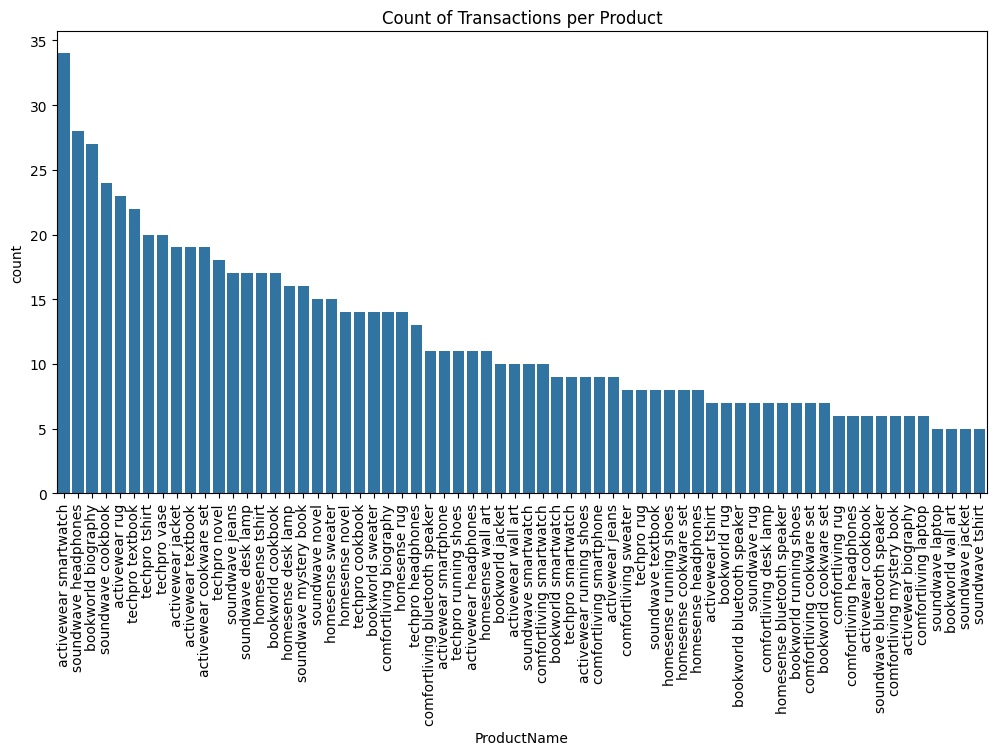

In [6]:
# count transaction per product
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ProductName', order=df['ProductName'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Transactions per Product')
plt.show()

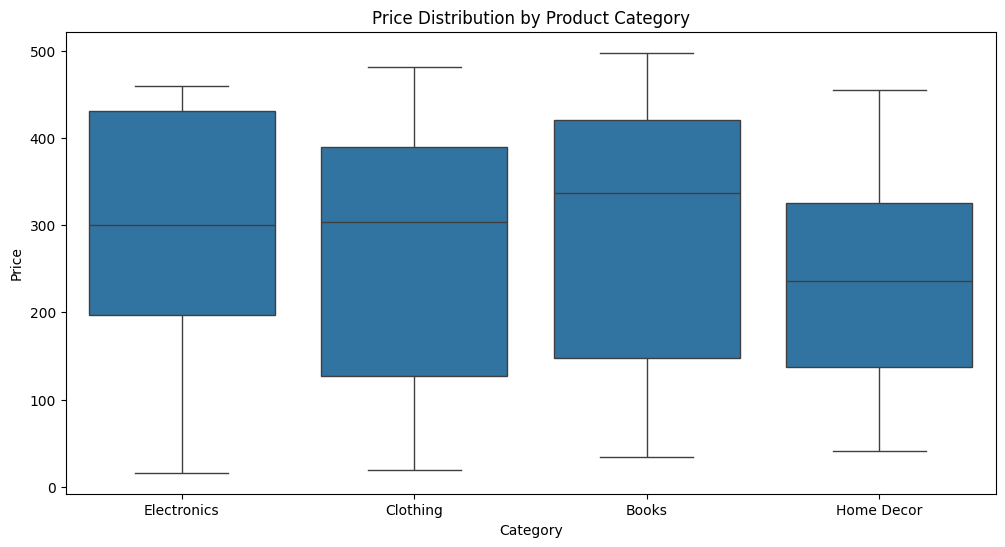

In [ ]:
# how price vary across categories
# Visualize price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Price')
plt.title('Price Distribution by Product Category')
plt.show()


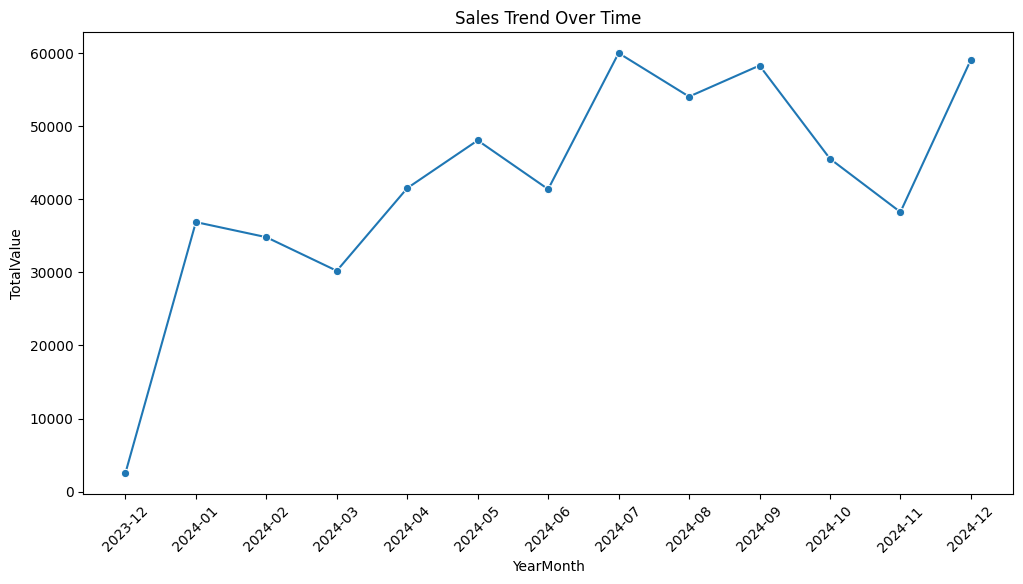

In [17]:
# Track the total sales over time
# Combine the Year and Month to create a 'YearMonth' column
df['YearMonth'] = df['tYear'].astype(str) + '-' + df['tnMonth'].astype(str).str.zfill(2)

sales_trend = df.groupby('YearMonth')['TotalValue'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='YearMonth', y='TotalValue', marker='o')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

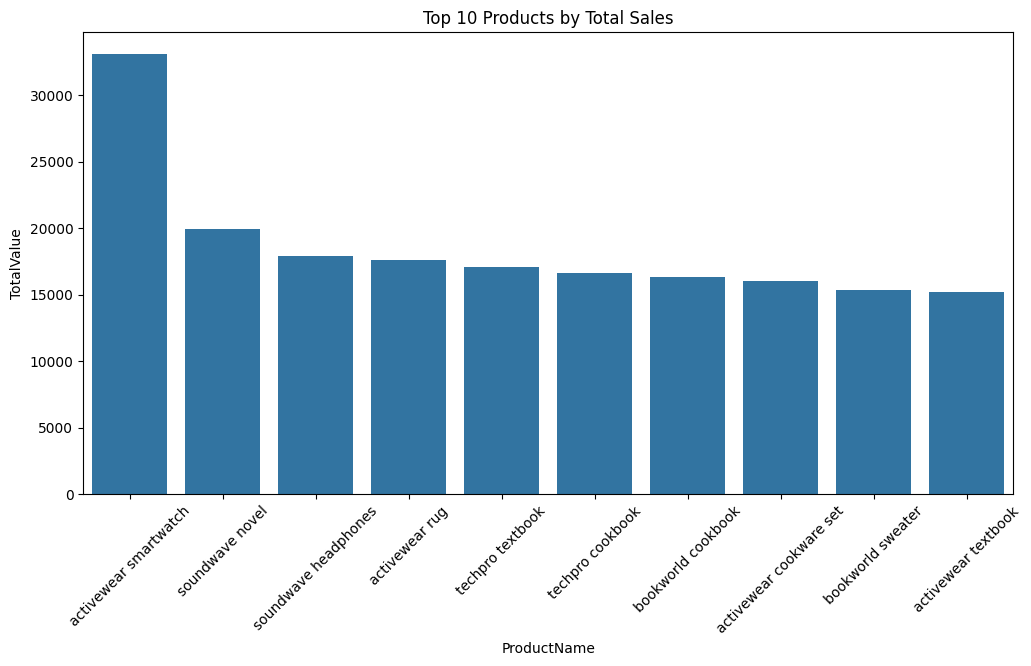

In [15]:
# the top-performing products in terms of total sales
top_products = df.groupby('ProductName')['TotalValue'].sum().reset_index()
top_products_sorted = top_products.sort_values(by='TotalValue', ascending=False).head(10)
top_products_sorted

#top 10 products by total sales
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_sorted, x='ProductName', y='TotalValue')
plt.xticks(rotation=45)
plt.title('Top 10 Products by Total Sales')
plt.show()

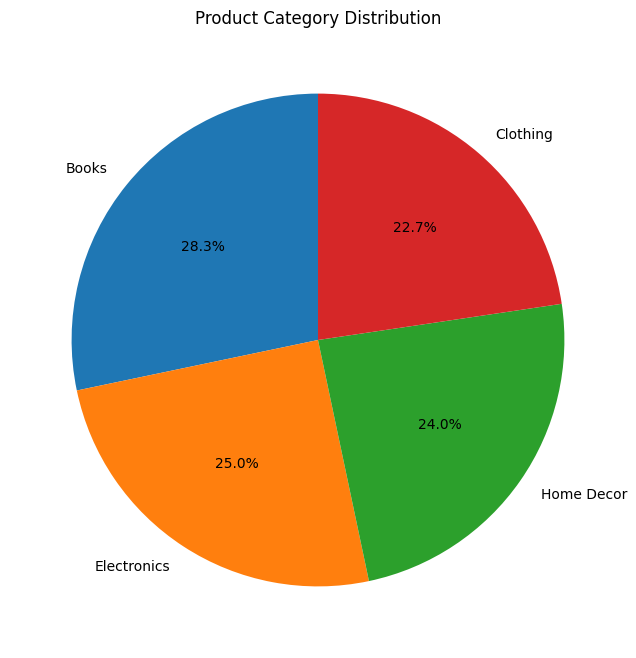

In [12]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Category Distribution')
plt.show()

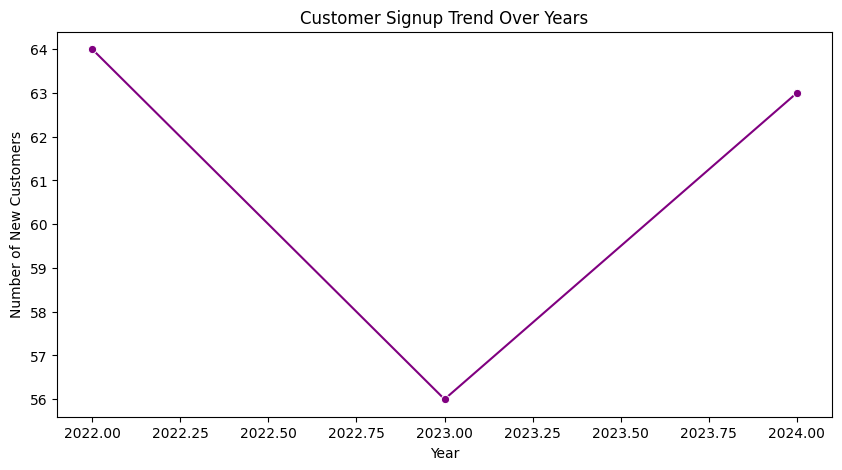

In [9]:
#  Signup vs. Purchase Trend
df["SignupYear"] = df["SignupDate"].dt.year
signup_trend = df.groupby("SignupYear")["CustomerID"].nunique()
signup_trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=signup_trend.index, y=signup_trend.values, marker="o", color="purple")
plt.title("Customer Signup Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of New Customers")
plt.show()